# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow

In [2]:
!pip install opencv-python

In [3]:
!pip install mediapipe

In [4]:
!pip install sklearn

In [5]:
!pip install matplotlib

In [6]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [7]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [8]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [9]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [10]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [11]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [12]:
results

mediapipe.python.solution_base.SolutionOutputs

In [13]:
draw_landmarks(frame, results)

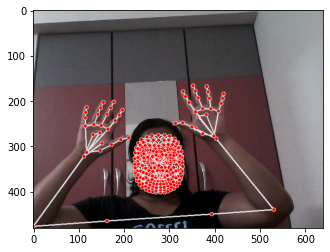

In [14]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [15]:
len(results.face_landmarks.landmark)

468

In [16]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [17]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [11]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [19]:
result_test = extract_keypoints(results)

In [20]:
result_test

array([ 0.43317598,  0.71285862, -0.93022025, ...,  0.18522379,
        0.44671375, -0.03117587])

In [21]:
468*3+33*4+21*3+21*3

1662

In [30]:
cap.release()
cv2.destroyAllWindows()

In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [69]:
label_map = {label:num for num, label in enumerate(actions)}

In [64]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [34]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [35]:
np.array(sequences).shape

(90, 30, 1662)

In [36]:
np.array(labels).shape

(90,)

In [37]:
X = np.array(sequences)

In [38]:
X.shape

(90, 30, 1662)

In [39]:
y = to_categorical(labels).astype(int)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [41]:
y_test.shape

(5, 3)

# 4. Build and Train LSTM Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [42]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [ ]:
res = [.7, 0.2, 0.1]

In [ ]:
actions[np.argmax(res)]

In [43]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [44]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 10s 167ms/step - loss: 1.0804 - categorical_accuracy: 0.3176
Epoch 2/2000
3/3 [==============================] - 1s 234ms/step - loss: 1.1223 - categorical_accuracy: 0.3176
Epoch 3/2000
3/3 [==============================] - 0s 153ms/step - loss: 1.0462 - categorical_accuracy: 0.3529
Epoch 4/2000
3/3 [==============================] - 1s 289ms/step - loss: 0.9850 - categorical_accuracy: 0.4118
Epoch 5/2000
3/3 [==============================] - 0s 189ms/step - loss: 0.9466 - categorical_accuracy: 0.3647
Epoch 6/2000
3/3 [==============================] - 1s 193ms/step - loss: 0.8786 - categorical_accuracy: 0.4000
Epoch 7/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.8716 - categorical_accuracy: 0.4471
Epoch 8/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.7596 - categorical_accuracy: 0.5882
Epoch 9/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.7999 - categorical_accuracy

3/3 [==============================] - 0s 141ms/step - loss: 1.5333 - categorical_accuracy: 0.2941
Epoch 145/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.5767 - categorical_accuracy: 0.3765
Epoch 146/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.1238 - categorical_accuracy: 0.3412
Epoch 147/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.1120 - categorical_accuracy: 0.3294
Epoch 148/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.1050 - categorical_accuracy: 0.3412
Epoch 149/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.1031 - categorical_accuracy: 0.3412
Epoch 150/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.1505 - categorical_accuracy: 0.3412
Epoch 151/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.1010 - categorical_accuracy: 0.3412
Epoch 152/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.1003 - categorical_accuracy: 0.34

3/3 [==============================] - 0s 125ms/step - loss: 1.0969 - categorical_accuracy: 0.3412
Epoch 289/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0950 - categorical_accuracy: 0.3412
Epoch 290/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0925 - categorical_accuracy: 0.3412
Epoch 291/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0917 - categorical_accuracy: 0.3412
Epoch 292/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0908 - categorical_accuracy: 0.3412
Epoch 293/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0897 - categorical_accuracy: 0.3412
Epoch 294/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0892 - categorical_accuracy: 0.3412
Epoch 295/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0877 - categorical_accuracy: 0.3412
Epoch 296/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0850 - categorical_accuracy: 0.34

3/3 [==============================] - 0s 112ms/step - loss: 0.5161 - categorical_accuracy: 0.7647
Epoch 433/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.5095 - categorical_accuracy: 0.7765
Epoch 434/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.5287 - categorical_accuracy: 0.7412
Epoch 435/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.4743 - categorical_accuracy: 0.8000
Epoch 436/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.4912 - categorical_accuracy: 0.7529
Epoch 437/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.5957 - categorical_accuracy: 0.7412
Epoch 438/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.4991 - categorical_accuracy: 0.7765
Epoch 439/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.4866 - categorical_accuracy: 0.8000
Epoch 440/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.4459 - categorical_accuracy: 0.7

3/3 [==============================] - 0s 95ms/step - loss: 0.7870 - categorical_accuracy: 0.5765
Epoch 577/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.7848 - categorical_accuracy: 0.6235
Epoch 578/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.7806 - categorical_accuracy: 0.7412
Epoch 579/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.7719 - categorical_accuracy: 0.7765
Epoch 580/2000
3/3 [==============================] - 0s 102ms/step - loss: 1990.2089 - categorical_accuracy: 0.6000
Epoch 581/2000
3/3 [==============================] - 0s 91ms/step - loss: 2681.1636 - categorical_accuracy: 0.3412
Epoch 582/2000
3/3 [==============================] - 0s 107ms/step - loss: 3691.7581 - categorical_accuracy: 0.3176
Epoch 583/2000
3/3 [==============================] - 0s 90ms/step - loss: 1426.9302 - categorical_accuracy: 0.2941
Epoch 584/2000
3/3 [==============================] - 0s 99ms/step - loss: 4734.2612 - categorica

3/3 [==============================] - 0s 98ms/step - loss: 0.9635 - categorical_accuracy: 0.6471
Epoch 649/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.9637 - categorical_accuracy: 0.6941
Epoch 650/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.9549 - categorical_accuracy: 0.6706
Epoch 651/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.9561 - categorical_accuracy: 0.6706
Epoch 652/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.9465 - categorical_accuracy: 0.6941
Epoch 653/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.9471 - categorical_accuracy: 0.6588
Epoch 654/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.9464 - categorical_accuracy: 0.6706
Epoch 655/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.9584 - categorical_accuracy: 0.6235
Epoch 656/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.9679 - categorical_accuracy: 0.635

3/3 [==============================] - 0s 91ms/step - loss: 0.6186 - categorical_accuracy: 0.8706
Epoch 793/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.6114 - categorical_accuracy: 0.7882
Epoch 794/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.5967 - categorical_accuracy: 0.8706
Epoch 795/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.5553 - categorical_accuracy: 0.8706
Epoch 796/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.5573 - categorical_accuracy: 0.9294
Epoch 797/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.5715 - categorical_accuracy: 0.8353
Epoch 798/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.5670 - categorical_accuracy: 0.8471
Epoch 799/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.5481 - categorical_accuracy: 0.9412
Epoch 800/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.5492 - categorical_accuracy: 0.

3/3 [==============================] - 0s 102ms/step - loss: 0.2629 - categorical_accuracy: 0.9412
Epoch 937/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.2681 - categorical_accuracy: 0.9059
Epoch 938/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.3283 - categorical_accuracy: 0.8706
Epoch 939/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.2862 - categorical_accuracy: 0.9059
Epoch 940/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.3513 - categorical_accuracy: 0.8824
Epoch 941/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.2891 - categorical_accuracy: 0.8941
Epoch 942/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.4903 - categorical_accuracy: 0.7882
Epoch 943/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.3047 - categorical_accuracy: 0.9176
Epoch 944/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.2787 - categorical_accuracy: 0

3/3 [==============================] - 0s 98ms/step - loss: 0.0792 - categorical_accuracy: 0.9765
Epoch 1080/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.1061 - categorical_accuracy: 0.9765
Epoch 1081/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.0931 - categorical_accuracy: 0.9765
Epoch 1082/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0957 - categorical_accuracy: 0.9882
Epoch 1083/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.1192 - categorical_accuracy: 0.9647
Epoch 1084/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.1087 - categorical_accuracy: 0.9647
Epoch 1085/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.1281 - categorical_accuracy: 0.9647
Epoch 1086/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.1189 - categorical_accuracy: 0.9765
Epoch 1087/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.1498 - categorical_accura

3/3 [==============================] - 0s 87ms/step - loss: 0.0668 - categorical_accuracy: 0.9882
Epoch 1222/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.0445 - categorical_accuracy: 0.9882
Epoch 1223/2000
3/3 [==============================] - 0s 146ms/step - loss: 0.0960 - categorical_accuracy: 0.9647
Epoch 1224/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.1032 - categorical_accuracy: 0.9647
Epoch 1225/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.1681 - categorical_accuracy: 0.9412
Epoch 1226/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.2044 - categorical_accuracy: 0.9529
Epoch 1227/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.3060 - categorical_accuracy: 0.8471
Epoch 1228/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.1003 - categorical_accuracy: 0.9765
Epoch 1229/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.2010 - categorical_a

3/3 [==============================] - 0s 98ms/step - loss: 0.1711 - categorical_accuracy: 0.9412
Epoch 1364/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.1445 - categorical_accuracy: 0.9647
Epoch 1365/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.1335 - categorical_accuracy: 0.9647
Epoch 1366/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.1143 - categorical_accuracy: 0.9647
Epoch 1367/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.1148 - categorical_accuracy: 0.9647
Epoch 1368/2000
3/3 [==============================] - 0s 185ms/step - loss: 0.1244 - categorical_accuracy: 0.9647
Epoch 1369/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.1114 - categorical_accuracy: 0.9765
Epoch 1370/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.1150 - categorical_accuracy: 0.9647
Epoch 1371/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.1285 - categorical_accu

3/3 [==============================] - 0s 93ms/step - loss: 0.0613 - categorical_accuracy: 0.9882
Epoch 1506/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0613 - categorical_accuracy: 0.9882
Epoch 1507/2000
3/3 [==============================] - 0s 156ms/step - loss: 0.0597 - categorical_accuracy: 0.9882
Epoch 1508/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.0612 - categorical_accuracy: 0.9882
Epoch 1509/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0591 - categorical_accuracy: 0.9882
Epoch 1510/2000
3/3 [==============================] - 0s 144ms/step - loss: 0.0600 - categorical_accuracy: 0.9882
Epoch 1511/2000
3/3 [==============================] - 0s 146ms/step - loss: 0.0590 - categorical_accuracy: 0.9882
Epoch 1512/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.0591 - categorical_accuracy: 0.9882
Epoch 1513/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0589 - categorical_ac

3/3 [==============================] - 0s 106ms/step - loss: 0.0393 - categorical_accuracy: 0.9765
Epoch 1648/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.0702 - categorical_accuracy: 0.9882
Epoch 1649/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.0825 - categorical_accuracy: 0.9765
Epoch 1650/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.0632 - categorical_accuracy: 0.9882
Epoch 1651/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.1116 - categorical_accuracy: 0.9529
Epoch 1652/2000
3/3 [==============================] - 0s 138ms/step - loss: 0.2370 - categorical_accuracy: 0.9294
Epoch 1653/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.2642 - categorical_accuracy: 0.9176
Epoch 1654/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.2027 - categorical_accuracy: 0.9294
Epoch 1655/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0927 - categorical

3/3 [==============================] - 0s 94ms/step - loss: 0.0034 - categorical_accuracy: 1.0000
Epoch 1790/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0034 - categorical_accuracy: 1.0000
Epoch 1791/2000
3/3 [==============================] - 0s 143ms/step - loss: 0.0034 - categorical_accuracy: 1.0000
Epoch 1792/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.0034 - categorical_accuracy: 1.0000
Epoch 1793/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0033 - categorical_accuracy: 1.0000
Epoch 1794/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.0033 - categorical_accuracy: 1.0000
Epoch 1795/2000
3/3 [==============================] - 0s 142ms/step - loss: 0.0033 - categorical_accuracy: 1.0000
Epoch 1796/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0033 - categorical_accuracy: 1.0000
Epoch 1797/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0032 - categorical_a

3/3 [==============================] - 1s 166ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 1932/2000
3/3 [==============================] - 1s 174ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 1933/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 1934/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 1935/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 1936/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 1937/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 1938/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 1939/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.0015 - categorical_

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# 5. Make Predictions

In [45]:
res = model.predict(X_test)

In [60]:
actions[np.argmax(res[4])]

'hello'

In [61]:
actions[np.argmax(y_test[4])]

'hello'

# 6. Save Weights

In [49]:
model.save('action.h5')

In [ ]:
del model

In [44]:
model.load_weights('action.h5')

# 7. Evaluation using Confusion Matrix and Accuracy

In [49]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [50]:
yhat = model.predict(X_test)

In [51]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [52]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 1],
        [1, 1]],

       [[2, 1],
        [0, 2]],

       [[4, 0],
        [1, 0]]], dtype=int64)

In [53]:
accuracy_score(ytrue, yhat)

0.6

# 8. Test in Real Time

In [62]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [71]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            #image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thankyou
<

In [61]:
cap.release()
cv2.destroyAllWindows()

In [62]:
res[np.argmax(res)] > threshold

True

In [74]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter=True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,tf.lite.OpsSet.SELECT_TF_OPS]

tfmodel = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tfmodel)

INFO:tensorflow:Assets written to: C:\Users\RIMJHI~1\AppData\Local\Temp\tmpa_21_ilw\assets


INFO:tensorflow:Assets written to: C:\Users\RIMJHI~1\AppData\Local\Temp\tmpa_21_ilw\assets
